1. **Import Necessary Libraries:**  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score, adjusted_rand_score

2. **Load the Dataset:**

We'll use the Iris dataset, a commonly used dataset for clustering:

In [2]:
iris = load_iris()
X = iris.data
y_true = iris.target  # True labels for validation purposes

3. **Perform K-means Clustering:**

Determine the optimal number of clusters using the elbow method and silhouette score:

In [3]:
inertia = []
silhouette_scores = []

range_n_clusters = range(2, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

4. **Plot the Elbow Method:**

The elbow method helps to choose the number of clusters by plotting the inertia (sum of squared distances to the nearest cluster center):

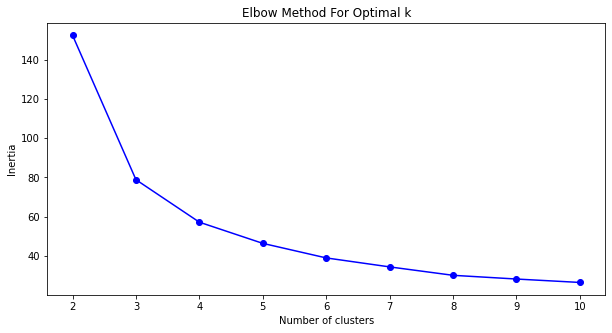

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

5. **Plot Silhouette Scores:**

The silhouette score measures how similar an object is to its own cluster compared to other clusters:

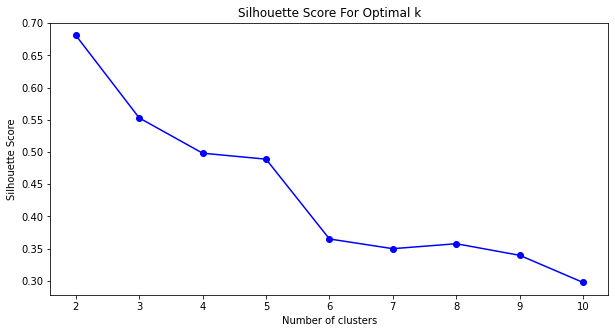

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.show()

6. **Fit K-means with the Optimal Number of Clusters:**

Based on the elbow method and silhouette score, choose an optimal number of clusters (e.g., 3 for Iris dataset):

In [6]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

7. **Evaluate the Clustering Performance:**

Use the adjusted Rand index (ARI) to compare the clustering labels with the true labels. ARI measures the similarity between the clustering and the true labels, adjusted for chance:

In [7]:
ari_score = adjusted_rand_score(y_true, y_kmeans)
silhouette_avg = silhouette_score(X, y_kmeans)

print(f'Adjusted Rand Index: {ari_score}')
print(f'Silhouette Score: {silhouette_avg}')

Adjusted Rand Index: 0.7302382722834697
Silhouette Score: 0.5528190123564095
